## Import the Dataset

In [1]:
import sqlite3 ## Import the sqlite3 library to process the database with SQL

In [2]:
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [3]:
cur = con.cursor()

In [4]:
accident_info = cur.execute(f"PRAGMA table_info(accident)")

In [5]:
accident_data = accident_info.fetchall()

In [6]:
accident_list = []

for i in accident_data:
    accident_list.append(i[1])

In [ ]:
print(accident_list)

In [8]:
vehicle_info = cur.execute(f"PRAGMA table_info(vehicle)")
vehicle_data = vehicle_info.fetchall()
vehicle_list = []

for i in vehicle_data:
    vehicle_list.append(i[1])

print(vehicle_list)

['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type']


In [9]:
casualty_info = cur.execute(f"PRAGMA table_info(casualty)")
casualty_data = casualty_info.fetchall()
casualty_list = []

for i in casualty_data:
    casualty_list.append(i[1])

print(casualty_list)

['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']


In [10]:
lsoa_info = cur.execute(f"PRAGMA table_info(lsoa)")
lsoa_data = lsoa_info.fetchall()
lsoa_list = []

for i in lsoa_data:
    lsoa_list.append(i[1])

print(lsoa_list)

['objectid', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'globalid']


In [11]:
cur.execute("SELECT COUNT(*) from accident")
cur.fetchall()

[(461352,)]

We only use the accident database from 2020 so we need to filter it.

In [12]:
cur.execute("SELECT * FROM accident WHERE accident_year = 2020")
        
accident_2020 = cur.fetchall()
accident_2020

[('2020010219808',
  2020,
  '010219808',
  521389.0,
  175144.0,
  -0.254001,
  51.462262,
  1,
  3,
  1,
  1,
  '04/02/2020',
  3,
  '09:00',
  10,
  'E09000032',
  'E09000032',
  6,
  0,
  6,
  20,
  0,
  -1,
  0,
  -1,
  9,
  9,
  1,
  9,
  9,
  0,
  0,
  1,
  3,
  2,
  'E01004576'),
 ('2020010220496',
  2020,
  '010220496',
  529337.0,
  176237.0,
  -0.139253,
  51.470327,
  1,
  3,
  1,
  2,
  '27/04/2020',
  2,
  '13:55',
  9,
  'E09000022',
  'E09000022',
  3,
  3036,
  6,
  20,
  9,
  2,
  6,
  0,
  0,
  4,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  'E01003034'),
 ('2020010228005',
  2020,
  '010228005',
  526432.0,
  182761.0,
  -0.178719,
  51.529614,
  1,
  3,
  1,
  1,
  '01/01/2020',
  4,
  '01:25',
  1,
  'E09000033',
  'E09000033',
  5,
  0,
  6,
  30,
  3,
  1,
  6,
  0,
  0,
  0,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  'E01004726'),
 ('2020010228006',
  2020,
  '010228006',
  538676.0,
  184371.0,
  -0.001683,
  51.54121,
  1,
  2,
  1,
  1,
  '01/01/2020',
  4,
  '0

In [13]:
cur.execute("SELECT * FROM vehicle WHERE accident_year = 2020")
        
vehicle_2020 = cur.fetchall()
vehicle_2020

[(681716,
  '2020010219808',
  2020,
  '010219808',
  1,
  9,
  9,
  5,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  9,
  6,
  2,
  32,
  6,
  1968,
  2,
  6,
  'AUDI Q5',
  4,
  1),
 (681717,
  '2020010220496',
  2020,
  '010220496',
  1,
  9,
  0,
  4,
  2,
  6,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  1,
  2,
  1,
  45,
  7,
  1395,
  1,
  2,
  'AUDI A1',
  7,
  1),
 (681718,
  '2020010228005',
  2020,
  '010228005',
  1,
  9,
  0,
  18,
  -1,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  3,
  -1,
  -1,
  -1,
  -1,
  -1,
  '-1',
  -1,
  -1),
 (681719,
  '2020010228006',
  2020,
  '010228006',
  1,
  8,
  0,
  18,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  44,
  7,
  1798,
  8,
  8,
  'TOYOTA PRIUS',
  2,
  1),
 (681720,
  '2020010228011',
  2020,
  '010228011',
  1,
  9,
  0,
  18,
  3,
  7,
  9,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  1,
  20,
  4,
  2993,
  2,
  4,
  'BMW 4 SERIES',
  -1,
  -1),
 (681721,
  '2020010228012',
  2020,
  '010228012',
  1,
  9

In [14]:
cur.execute("SELECT * FROM casualty WHERE accident_year = 2020")
        
casualty_2020 = cur.fetchall()
casualty_2020

[(484748,
  '2020010219808',
  2020,
  '010219808',
  1,
  1,
  3,
  1,
  31,
  6,
  3,
  9,
  5,
  0,
  0,
  0,
  0,
  1,
  4),
 (484749,
  '2020010220496',
  2020,
  '010220496',
  1,
  1,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484750,
  '2020010220496',
  2020,
  '010220496',
  1,
  2,
  3,
  2,
  4,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484751,
  '2020010228005',
  2020,
  '010228005',
  1,
  1,
  3,
  1,
  23,
  5,
  3,
  5,
  9,
  0,
  0,
  0,
  0,
  1,
  3),
 (484752,
  '2020010228006',
  2020,
  '010228006',
  1,
  1,
  3,
  1,
  47,
  8,
  2,
  4,
  1,
  0,
  0,
  0,
  0,
  1,
  3),
 (484753,
  '2020010228011',
  2020,
  '010228011',
  1,
  1,
  3,
  2,
  32,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  1,
  8),
 (484754,
  '2020010228011',
  2020,
  '010228011',
  1,
  2,
  3,
  2,
  33,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  -1,
  -1),
 (484755,
  '2020010228012',
  2020,
  '010228012',
  1,
  1,
  1,
  1,
  25,
  5,
  3,
  0,
  0,

In [15]:
cur.execute("SELECT * FROM lsoa")
        
lsoa = cur.fetchall()
lsoa

[(1,
  'E01000001',
  'City of London 001A',
  'City of London 001A',
  129865.232551575,
  2635.77200095126,
  '68cc6127-1008-4fbe-a16c-78fb089a7c43'),
 (2,
  'E01000002',
  'City of London 001B',
  'City of London 001B',
  228418.896621704,
  2707.98620166511,
  '937edbc3-c1bf-4d35-b274-b0a1480a7c09'),
 (3,
  'E01000003',
  'City of London 001C',
  'City of London 001C',
  59054.7690048218,
  1224.77447915666,
  '2686dcaf-10b9-4736-92af-4788d4feaa69'),
 (4,
  'E01000004',
  'City of London 001D',
  'City of London 001D',
  2544551.14173126,
  10718.4662400471,
  '3c493140-0b3f-4b9a-b358-22011dc5fb89'),
 (5,
  'E01000005',
  'City of London 001E',
  'City of London 001E',
  189578.164024353,
  2275.8093576013,
  'b569093d-788d-41be-816c-d6d7658b2311'),
 (6,
  'E01000006',
  'Barking and Dagenham 016A',
  'Barking and Dagenham 016A',
  146536.3332901,
  1966.13897042181,
  '0c8f097b-5cb2-4a07-a821-64159adecf58'),
 (7,
  'E01000007',
  'Barking and Dagenham 015A',
  'Barking and Dagenha

In [16]:
import pandas as pd

In [17]:
lsoa_df = pd.DataFrame(lsoa, columns = lsoa_list)

In [18]:
accident_df = pd.DataFrame(accident_2020, columns = accident_list)
# accident_df

In [19]:
vehicle_df = pd.DataFrame(vehicle_2020, columns = vehicle_list)
# vehicle_df

In [20]:
casualty_df = pd.DataFrame(casualty_2020, columns = casualty_list)
# casualty_df

In [21]:
from sklearn.cluster import KMeans
import numpy as np

### Data Preprocessing and Cleaning

In [22]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

There are some missing value in accident table. We need to check what value that miss.

In [23]:
accident_df[accident_df['longitude'].isnull()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,2020052002442,2020,052002442,NaN,NaN,NaN,NaN,5,2,2,...,0,1,1,1,0,0,3,1,2,-1
29452,2020070769852,2020,070769852,NaN,NaN,NaN,NaN,7,3,2,...,0,1,1,1,0,0,3,1,2,-1
32689,2020122001194,2020,122001194,NaN,NaN,NaN,NaN,12,3,2,...,0,1,2,2,0,0,3,1,2,-1
33578,2020137330369,2020,137330369,NaN,NaN,NaN,NaN,13,3,2,...,0,1,1,1,0,0,3,1,1,-1
81252,2020522005114,2020,522005114,NaN,NaN,NaN,NaN,52,3,3,...,0,7,1,1,0,0,3,1,2,-1
86437,2020622001016,2020,622001016,NaN,NaN,NaN,NaN,62,3,2,...,5,4,1,1,0,0,3,1,-1,-1
86642,202063A017520,2020,63A017520,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,-1,0,0,3,2,-1,-1
86651,202063A018920,2020,63A018920,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,1,0,0,3,2,-1,-1
86668,202063A025020,2020,63A025020,NaN,NaN,NaN,NaN,63,3,2,...,0,1,2,2,0,0,3,2,-1,-1
86705,202063A035620,2020,63A035620,NaN,NaN,NaN,NaN,63,3,1,...,0,1,1,1,0,0,3,2,-1,-1


In [24]:
accident_df[accident_df['police_force'] == 63]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
86592,2020632000892,2020,632000892,284537.0,211380.0,-3.675463,51.789128,63,3,2,...,0,1,1,1,0,0,2,1,-1,W01000496
86593,2020632001002,2020,632001002,290308.0,207467.0,-3.590589,51.755121,63,3,1,...,0,1,1,2,0,0,2,1,-1,W01000496
86594,202063A000320,2020,63A000320,262830.0,221570.0,-3.994042,51.875788,63,3,1,...,0,4,1,1,0,0,2,1,-1,W01000677
86595,202063A001220,2020,63A001220,252080.0,243420.0,-4.159508,52.069351,63,2,1,...,0,1,1,1,0,0,2,1,-1,W01000702
86596,202063A001321,2020,63A001321,251510.0,202390.0,-4.150151,51.700560,63,3,2,...,0,1,1,1,0,0,2,1,-1,W01000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87358,202063D087420,2020,63D087420,324240.0,306420.0,-3.121276,52.650214,63,2,1,...,0,1,1,2,0,0,2,1,-1,W01000441
87359,202063DF01120,2020,63DF01120,325360.0,319840.0,-3.107776,52.770987,63,1,1,...,0,1,1,1,0,0,2,1,-1,W01000458
87360,202063DF01220,2020,63DF01220,322000.0,243260.0,-3.139679,52.082186,63,1,6,...,0,1,1,1,0,0,2,1,-1,W01000443
87361,202063DF01520,2020,63DF01520,297230.0,220710.0,-3.494276,51.875464,63,1,1,...,0,6,1,1,0,0,2,1,-1,W01001897


The interpolation method was applied for missing value in latitude and longitude columns.

In [25]:
accident_df.loc[accident_df['police_force'] == 63] = accident_df.interpolate()

In [26]:
accident_df.loc[accident_df['police_force'] == 62] = accident_df.interpolate()
accident_df.loc[accident_df['police_force'] == 52] = accident_df.interpolate()
accident_df.loc[accident_df['police_force'] == 13] = accident_df.interpolate()
accident_df.loc[accident_df['police_force'] == 12] = accident_df.interpolate()
accident_df.loc[accident_df['police_force'] == 7] = accident_df.interpolate()
accident_df.loc[accident_df['police_force'] == 5] = accident_df.interpolate()

In [27]:
accident_df[accident_df['police_force'] == 5] # Check if the interpolation done properly

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
24015,2020050080223,2020,050080223,352108.0,390290.0,-2.721876,53.407256,5,3,2,...,0,1,1,1,0,0,2,1,1,E01006898
24016,2020050116655,2020,050116655,332853.0,380487.0,-3.009391,53.317052,5,3,1,...,0,1,2,5,0,0,2,1,1,E01007148
24017,2020050178976,2020,050178976,349644.0,387676.0,-2.758520,53.383532,5,3,2,...,0,1,1,1,0,0,1,2,2,E01006503
24018,2020050702981,2020,050702981,350529.0,389736.0,-2.745539,53.402131,5,2,2,...,5,1,1,1,0,0,2,1,2,E01006889
24019,2020052000009,2020,052000009,338567.0,389668.0,-2.925419,53.400261,5,3,2,...,0,4,1,2,0,0,1,2,2,E01006727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25727,2020052100239,2020,052100239,341498.0,389591.0,-2.881328,53.399902,5,3,2,...,0,4,1,1,0,0,1,1,2,E01006580
25728,2020052100264,2020,052100264,346697.0,385050.0,-2.802377,53.359641,5,3,1,...,0,6,2,2,0,0,2,1,2,E01006420
25729,2020052100339,2020,052100339,361039.0,394272.0,-2.588035,53.443784,5,3,8,...,0,1,2,2,0,0,2,1,1,E01006859
25730,2020052100525,2020,052100525,341829.0,396843.0,-2.877692,53.465116,5,2,2,...,0,1,1,1,0,0,2,2,2,E01006418


In [28]:
accident_df[accident_df['police_force'] == 63] # Check if the interpolation done properly

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
86592,2020632000892,2020,632000892,284537.0,211380.0,-3.675463,51.789128,63,3,2,...,0,1,1,1,0,0,2,1,-1,W01000496
86593,2020632001002,2020,632001002,290308.0,207467.0,-3.590589,51.755121,63,3,1,...,0,1,1,2,0,0,2,1,-1,W01000496
86594,202063A000320,2020,63A000320,262830.0,221570.0,-3.994042,51.875788,63,3,1,...,0,4,1,1,0,0,2,1,-1,W01000677
86595,202063A001220,2020,63A001220,252080.0,243420.0,-4.159508,52.069351,63,2,1,...,0,1,1,1,0,0,2,1,-1,W01000702
86596,202063A001321,2020,63A001321,251510.0,202390.0,-4.150151,51.700560,63,3,2,...,0,1,1,1,0,0,2,1,-1,W01000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87358,202063D087420,2020,63D087420,324240.0,306420.0,-3.121276,52.650214,63,2,1,...,0,1,1,2,0,0,2,1,-1,W01000441
87359,202063DF01120,2020,63DF01120,325360.0,319840.0,-3.107776,52.770987,63,1,1,...,0,1,1,1,0,0,2,1,-1,W01000458
87360,202063DF01220,2020,63DF01220,322000.0,243260.0,-3.139679,52.082186,63,1,6,...,0,1,1,1,0,0,2,1,-1,W01000443
87361,202063DF01520,2020,63DF01520,297230.0,220710.0,-3.494276,51.875464,63,1,1,...,0,6,1,1,0,0,2,1,-1,W01001897


In [29]:
accident_df.loc[[86651,86652,86653,86654,86655]] # Check if the interpolation done properly

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
86651,202063A018920,2020,63A018920,245925.0,209275.0,-4.234127,51.760880,63,3,2,...,0,1,9,1,0,0,3,2,-1,-1
86652,202063A019020,2020,63A019020,251190.0,198500.0,-4.153119,51.665524,63,3,2,...,0,1,1,1,0,0,2,1,-1,W01000659
86653,202063A019120,2020,63A019120,251710.0,201710.0,-4.146970,51.694503,63,3,1,...,0,1,1,1,0,0,1,1,-1,W01000705
86654,202063A019720,2020,63A019720,259170.0,224060.0,-4.048190,51.897249,63,3,1,...,0,1,2,2,0,0,2,1,-1,W01000684
86655,202063A019920,2020,63A019920,257210.0,205960.0,-4.069192,51.734118,63,3,2,...,0,1,1,2,0,0,2,1,-1,W01000665


Check if there any unecessary value on the age of the driver.

In [30]:
vehicle_df['age_of_driver'].unique()

array([ 32,  45,  -1,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  59,  67,  34,  23,  54,  53,  27,  39,  56,
        43,  88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,
        58,  70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,
        78,  72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,
        10,  91,  84,  13,   8,  89,  93,  94,  92,   6,  12,   5,   4,
         7,  97,  95,   3,  98, 100,  99,  96], dtype=int64)

In [31]:
vehicle_df[vehicle_df['age_of_driver'] < 17 ]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
11,681727,2020010228018,2020,010228018,2,9,0,2,0,0,...,6,3,-1,-1,1984,1,1,AUDI Q5,-1,-1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
19,681735,2020010228031,2020,010228031,2,9,9,99,9,9,...,6,3,-1,-1,1229,1,8,VAUXHALL CORSA,-1,-1
21,681737,2020010228032,2020,010228032,2,9,0,2,0,0,...,6,3,-1,-1,1984,1,9,VOLKSWAGEN GOLF,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167302,849018,2020991012311,2020,991012311,2,19,0,2,0,0,...,6,3,-1,-1,2402,2,12,FORD TRANSIT,-1,-1
167340,849056,2020991016099,2020,991016099,2,9,0,2,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
167341,849057,2020991016099,2020,991016099,3,9,0,2,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
167342,849058,2020991016099,2020,991016099,4,9,0,2,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [32]:
vehicle_df[(vehicle_df['age_of_driver'] < 17) & (vehicle_df['age_of_driver'] > 0)]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
123,681839,2020010228288,2020,010228288,1,2,0,13,6,2,...,6,1,16,4,49,1,10,PIAGGIO FLY,3,1
132,681848,2020010228300,2020,010228300,2,2,0,18,2,6,...,6,1,16,4,48,1,11,PIAGGIO VESPA,6,1
263,681979,2020010228540,2020,010228540,2,2,0,99,9,9,...,6,1,16,4,49,1,2,-1,3,1
994,682710,2020010229954,2020,010229954,2,1,0,5,7,3,...,6,1,14,3,-1,-1,-1,-1,3,1
1559,683275,2020010231061,2020,010231061,2,1,0,7,2,4,...,4,1,11,3,-1,-1,-1,-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166679,848395,2020991002377,2020,991002377,2,1,0,18,4,7,...,6,1,13,3,-1,-1,-1,-1,9,1
166683,848399,2020991002390,2020,991002390,1,2,0,16,5,8,...,6,1,16,4,50,1,4,-1,7,2
167003,848719,2020991007258,2020,991007258,1,2,0,17,7,4,...,5,1,16,4,49,1,7,APRILIA SR 50,-1,-1
167023,848739,2020991007892,2020,991007892,1,1,0,18,8,5,...,5,1,15,3,-1,-1,-1,-1,-1,-1


Since the minimum legal driving age of UK is 17 years old, we need to impute the minor driver age value with median.

In [33]:
min_legal_age = 17

median_age = vehicle_df[vehicle_df['age_of_driver'] >= min_legal_age]['age_of_driver'].median()
vehicle_df.loc[vehicle_df['age_of_driver'] < min_legal_age, 'age_of_driver'] = median_age

There are some negative value in this columns. We need to impute it by median of the age of the driver.

In [34]:
vehicle_df.loc[vehicle_df['age_of_driver'] < 0, 'age_of_driver'] = median_age ## age of driver

In [35]:
def check_negative_values(df):
    columns_with_negatives = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Check only numerical columns
            if (df[column] == -1).any():
                columns_with_negatives.append(column)
    return columns_with_negatives

Also, we want to check if there are any negative value in another table.

In [36]:
negative_vehicle = check_negative_values(vehicle_df)
negative_vehicle

['towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'driver_imd_decile',
 'driver_home_area_type']

In [37]:
negative_accident = check_negative_values(accident_df)
negative_accident

['local_authority_district',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag']

In [38]:
negative_casualty = check_negative_values(casualty_df)
negative_casualty

['sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_home_area_type',
 'casualty_imd_decile']

We change the negative value into median.

In [39]:
for column in negative_vehicle:
    median_value = vehicle_df[vehicle_df[column] >= 0][column].median().round()
    vehicle_df.loc[vehicle_df[column] < 0, column] = median_value
    
for column in negative_accident:
    median_value = accident_df[accident_df[column] >= 0][column].median().round()
    accident_df.loc[accident_df[column] < 0, column] = median_value
    
for column in negative_casualty:
    median_value = casualty_df[casualty_df[column] >= 0][column].median().round()
    casualty_df.loc[casualty_df[column] < 0, column] = median_value

We need to change the date datatype to make it easier to process

In [40]:
accident_df[['accident_year', 'date', 'day_of_week', 'time']]

,accident_year,date,day_of_week,time
0,2020,04/02/2020,3,09:00
1,2020,27/04/2020,2,13:55
2,2020,01/01/2020,4,01:25
3,2020,01/01/2020,4,01:50
4,2020,01/01/2020,4,02:25
...,...,...,...,...
91194,2020,12/08/2020,4,14:30
91195,2020,13/11/2020,6,15:05
91196,2020,15/04/2020,4,12:42
91197,2020,15/12/2020,3,14:00


In [41]:
accident_df['date'] = pd.to_datetime(accident_df['date'])

C:\Users\878662\AppData\Local\Temp\ipykernel_25276\277530045.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accident_df['date'] = pd.to_datetime(accident_df['date'])


In [42]:
# Convert the time column to datetime format
accident_df['time'] = pd.to_datetime(accident_df['time'], format='%H:%M')

# Extract the hour and create a new column
accident_df['hour'] = accident_df['time'].dt.hour

### Accident Demography

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Custom function to replace the columns
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}


accident_df['day_of_week'] = accident_df['day_of_week'].map(day_mapping)

### Are there significant hours of the day, and days of the week, on which accidents occur?

In [45]:
## Significant hours of the day

In [46]:
import seaborn as sns

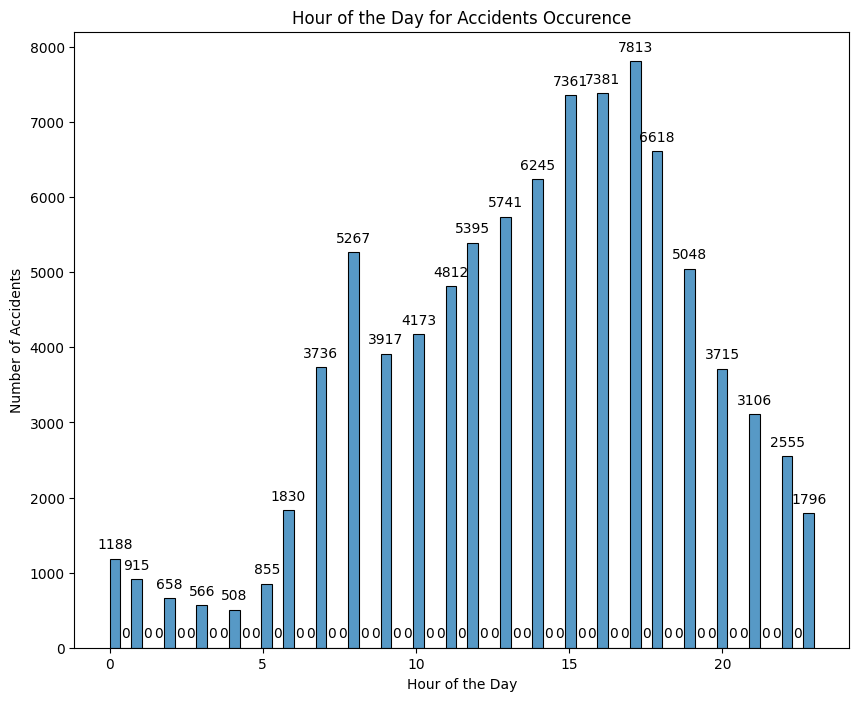

In [47]:
plt.figure(figsize=(10, 8))
ax_1 = sns.histplot(data = accident_df['hour'])


# Adding percentage text on top of each bar
for p in ax_1.patches:
    ax_1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Hour of the Day for Accidents Occurence')

# Show the plot
plt.show()

In [48]:
## Significant days of the week

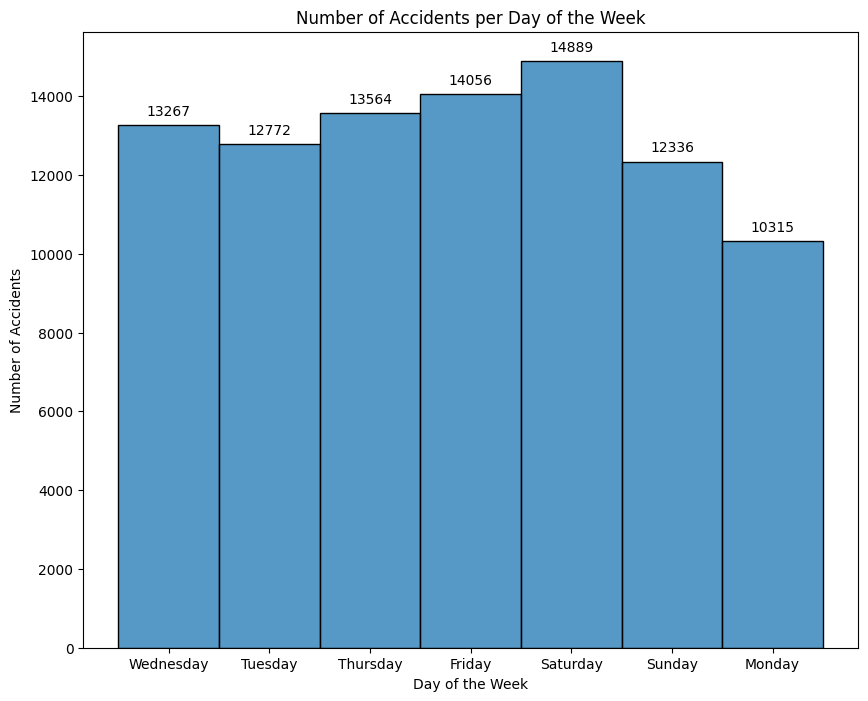

In [49]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = accident_df['day_of_week'])

# Adding percentage text on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Day of the Week')

# Show the plot
plt.show()

### For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

Motorcycle 50 cc and under : 02

Motorcycle over 50cc and up to 125cc : 03

Motorcycle over 125cc and up to 500cc : 04

Motorcycle over 500cc : 05

In [50]:
accident_vehicle = pd.merge(accident_df, vehicle_df, on = 'accident_index') # Merge accident table and vehicle table

In [51]:
specific_motorcycle = [2, 3, 4, 5] # Specify the type of the motorcycle
filtered = accident_vehicle[accident_vehicle['vehicle_type'].isin(specific_motorcycle)] # filter the type of the motorcycles

In [52]:
if 'accident_count' not in filtered.columns:
    filtered['accident_count'] = 1

C:\Users\878662\AppData\Local\Temp\ipykernel_25276\2216970851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['accident_count'] = 1


In [53]:
grouped = filtered.groupby(['hour', 'vehicle_type']).agg({'accident_count': 'sum'}).reset_index()

In [54]:
# Hours of the Day

C:\Users\878662\AppData\Local\Temp\ipykernel_25276\961605546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='hour', y='accident_count', hue='vehicle_type', ci=None)


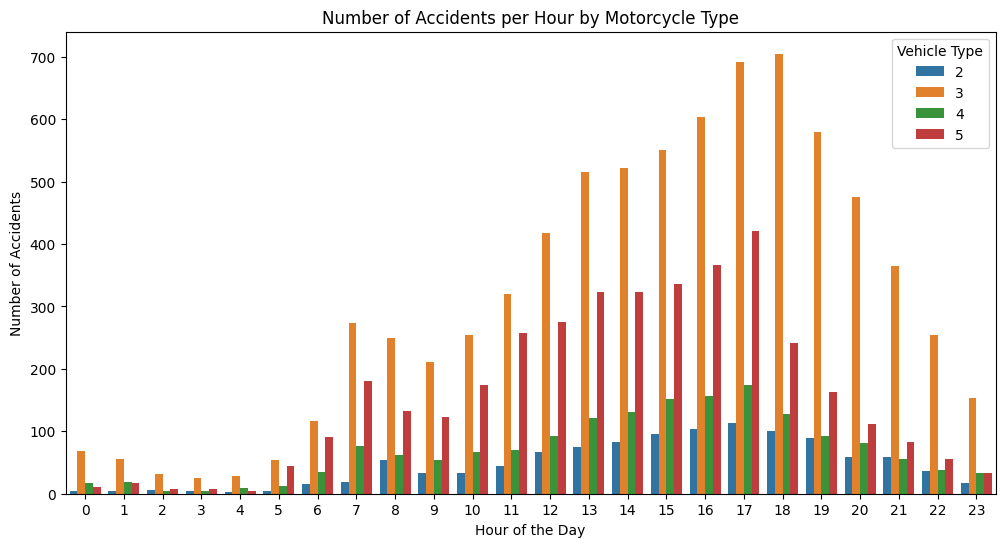

In [55]:
# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='hour', y='accident_count', hue='vehicle_type', ci=None)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour by Motorcycle Type')
plt.legend(title='Vehicle Type', loc='upper right')

# Show the plot
plt.show()

In [56]:
# Days of the Week

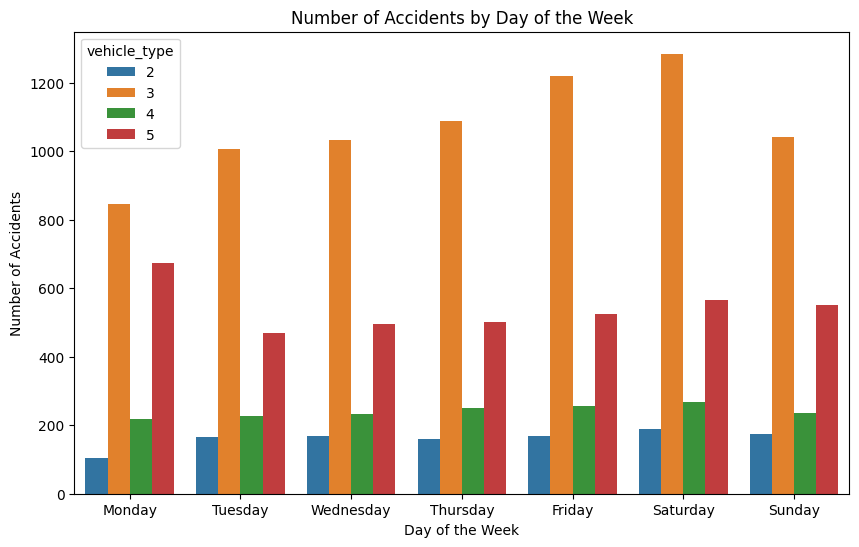

In [57]:
grouped_1 = filtered.groupby(['day_of_week', 'vehicle_type']).size().reset_index(name='accident_count')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_1, x='day_of_week', y='accident_count', hue='vehicle_type', order = day_order)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')

# Show the plot
plt.show()

### For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [58]:
accident_casualty = pd.merge(accident_df, casualty_df, on = 'accident_index')

In [59]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [60]:
pedestrian = accident_casualty[accident_casualty['casualty_class'] == 3]

In [61]:
grouped_2 = pedestrian.groupby('hour').size().reset_index(name='accident_count')

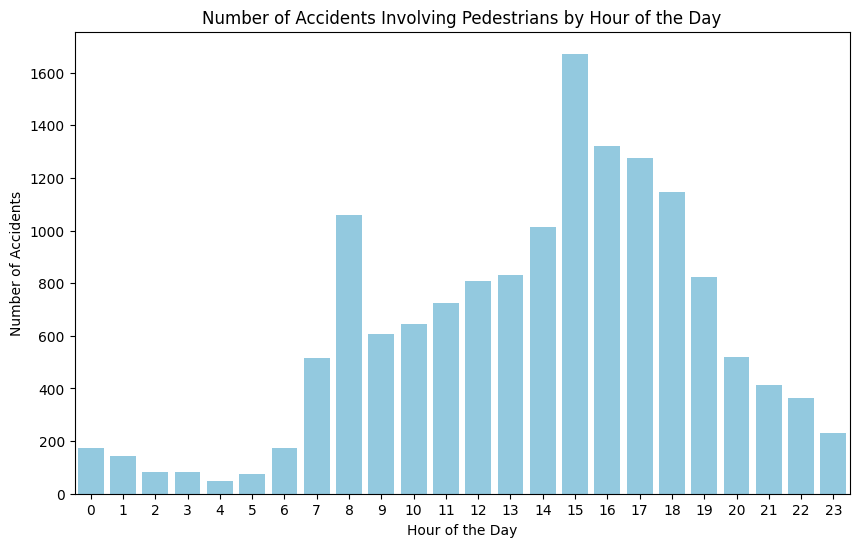

In [62]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_2, x='hour', y='accident_count', color='skyblue')

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Involving Pedestrians by Hour of the Day')

# Show the plot
plt.show()

In [63]:
grouped_3 = pedestrian.groupby('day_of_week').size().reset_index(name='accident_count')

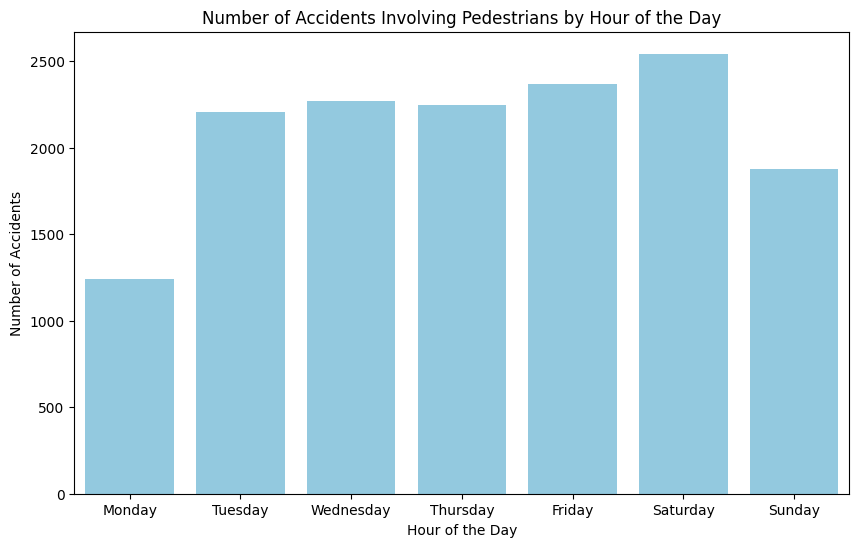

In [64]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_3, x='day_of_week', y='accident_count', color='skyblue', order = day_order)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Involving Pedestrians by Hour of the Day')

# Show the plot
plt.show()

### Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [65]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [66]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

**Understanding the columns**

`accident severity`: 1 = Fatal, 2 = Serious, 3 = Slight

`speed limits` : speed limit

`weather conditions` : 1 = Fine without high winds, 2 = Raining without high winds, 3 = Snowing without high winds, 4 = Fine with high winds, 5 = Raining with high winds, 6 = Snowing with high winds, 7 = Fog or mist--if hazard, 8 = Other, 9 = Unknown

**One-hot Encoding**

In [67]:
a_severity = pd.get_dummies(accident_df.accident_severity, prefix = "severity", dtype = int)
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [68]:
w_severity = pd.get_dummies(accident_df.weather_conditions, prefix = "weather", dtype = int)
w_severity

,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91194,1,0,0,0,0,0,0,0,0
91195,1,0,0,0,0,0,0,0,0
91196,1,0,0,0,0,0,0,0,0
91197,1,0,0,0,0,0,0,0,0


In [69]:
sl_severity = pd.get_dummies(accident_df.speed_limit, prefix = "speed_limit", dtype = int)
sl_severity

,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
91194,0,1,0,0,0,0
91195,0,1,0,0,0,0
91196,0,0,0,0,1,0
91197,0,1,0,0,0,0


In [70]:
df_acc_onehot = pd.concat([a_severity, w_severity, sl_severity], axis = 1)
df_acc_onehot

,severity_1,severity_2,severity_3,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70
0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
91195,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
91196,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
91197,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Running A Priori**

In [71]:
apriori_df = apriori(df_acc_onehot, min_support = 0.2, use_colnames = True)
apriori_df['length'] = apriori_df['itemsets'].apply(lambda x: len(x))
apriori_df

C:\Users\878662\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.201263,(severity_2),1
1,0.783484,(severity_3),1
2,0.775557,(weather_1),1
3,0.573164,(speed_limit_30),1
4,0.603186,"(weather_1, severity_3)",2
5,0.460082,"(speed_limit_30, severity_3)",2
6,0.450213,"(weather_1, speed_limit_30)",2
7,0.359763,"(weather_1, speed_limit_30, severity_3)",3


**Generating Rules**

accident severity: 1 = Fatal, 2 = Serious, 3 = Slight

speed limits : speed limit

weather conditions : 1 = Fine without high winds, 2 = Raining without high winds, 3 = Snowing without high winds, 4 = Fine with high winds, 5 = Raining with high winds, 6 = Snowing with high winds, 7 = Fog or mist--if hazard, 8 = Other, 9 = Unknown

In [72]:
lift_rules = association_rules(apriori_df, metric = "lift", min_threshold = 0.5)
lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.775557,0.783484,0.603186,0.777746,0.992676,-0.004450,0.974182,-0.031826
1,(severity_3),(weather_1),0.783484,0.775557,0.603186,0.769877,0.992676,-0.004450,0.975317,-0.032953
2,(speed_limit_30),(severity_3),0.573164,0.783484,0.460082,0.802705,1.024532,0.011017,1.097421,0.056098
3,(severity_3),(speed_limit_30),0.783484,0.573164,0.460082,0.587225,1.024532,0.011017,1.034065,0.110592
4,(weather_1),(speed_limit_30),0.775557,0.573164,0.450213,0.580503,1.012805,0.005692,1.017495,0.056329
5,(speed_limit_30),(weather_1),0.573164,0.775557,0.450213,0.785487,1.012805,0.005692,1.046294,0.029620
6,"(weather_1, speed_limit_30)",(severity_3),0.450213,0.783484,0.359763,0.799094,1.019923,0.007028,1.077696,0.035530
7,"(weather_1, severity_3)",(speed_limit_30),0.603186,0.573164,0.359763,0.596437,1.040604,0.014038,1.057668,0.098333
8,"(speed_limit_30, severity_3)",(weather_1),0.460082,0.775557,0.359763,0.781954,1.008248,0.002943,1.029338,0.015152
9,(weather_1),"(speed_limit_30, severity_3)",0.775557,0.460082,0.359763,0.463877,1.008248,0.002943,1.007078,0.036450


In [73]:
confidence_rules = association_rules(apriori_df, metric = "confidence", min_threshold = 0.5)
confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.775557,0.783484,0.603186,0.777746,0.992676,-0.004450,0.974182,-0.031826
1,(severity_3),(weather_1),0.783484,0.775557,0.603186,0.769877,0.992676,-0.004450,0.975317,-0.032953
2,(speed_limit_30),(severity_3),0.573164,0.783484,0.460082,0.802705,1.024532,0.011017,1.097421,0.056098
3,(severity_3),(speed_limit_30),0.783484,0.573164,0.460082,0.587225,1.024532,0.011017,1.034065,0.110592
4,(weather_1),(speed_limit_30),0.775557,0.573164,0.450213,0.580503,1.012805,0.005692,1.017495,0.056329
5,(speed_limit_30),(weather_1),0.573164,0.775557,0.450213,0.785487,1.012805,0.005692,1.046294,0.029620
6,"(weather_1, speed_limit_30)",(severity_3),0.450213,0.783484,0.359763,0.799094,1.019923,0.007028,1.077696,0.035530
7,"(weather_1, severity_3)",(speed_limit_30),0.603186,0.573164,0.359763,0.596437,1.040604,0.014038,1.057668,0.098333
8,"(speed_limit_30, severity_3)",(weather_1),0.460082,0.775557,0.359763,0.781954,1.008248,0.002943,1.029338,0.015152
9,(speed_limit_30),"(weather_1, severity_3)",0.573164,0.603186,0.359763,0.627678,1.040604,0.014038,1.065781,0.091416


In [137]:
support_rules = association_rules(apriori_df, metric = "support", min_threshold = 0.5)
support_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.775557,0.783484,0.603186,0.777746,0.992676,-0.00445,0.974182,-0.031826
1,(severity_3),(weather_1),0.783484,0.775557,0.603186,0.769877,0.992676,-0.00445,0.975317,-0.032953


### Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [74]:
lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [75]:
lsoa_df.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [76]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91199 non-null  float64       
 4   location_northing_osgr                       91199 non-null  float64       
 5   longitude                                    91199 non-null  float64       
 6   latitude                                     91199 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64         


In [77]:
accident_df['police_force'].unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [78]:
humberside_acc = accident_df[accident_df['police_force'] == 16]

In [79]:
humberside_acc

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour
37750,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,...,4,1,1,0,0,1,1,2,E01033109,2
37751,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,1,1,1,0,0,1,1,2,E01012777,11
37752,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,4,1,1,0,0,2,1,2,E01013325,16
37753,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,4,1,1,0,0,1,1,2,E01012788,17
37754,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,4,1,1,0,0,1,1,2,E01013220,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,1,1,1,0,0,1,2,2,E01013239,15
39455,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,4,1,1,0,0,1,2,2,E01013041,16
39456,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,1,1,1,0,0,1,2,2,E01012907,9
39457,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,1,1,1,0,1,2,2,1,E01013286,12


In [80]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
features = ['latitude','longitude']
X = humberside_acc[features]

In [83]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [84]:
kmeans = KMeans(n_clusters=25, random_state=0, n_init='auto').fit(X_scaled)

In [85]:
cluster_labels = kmeans.predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  val in data
C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  val in data
C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  val in data
C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  val in data
C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  val in data
C:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:917: DeprecationWarning: elementwise comparison failed; this

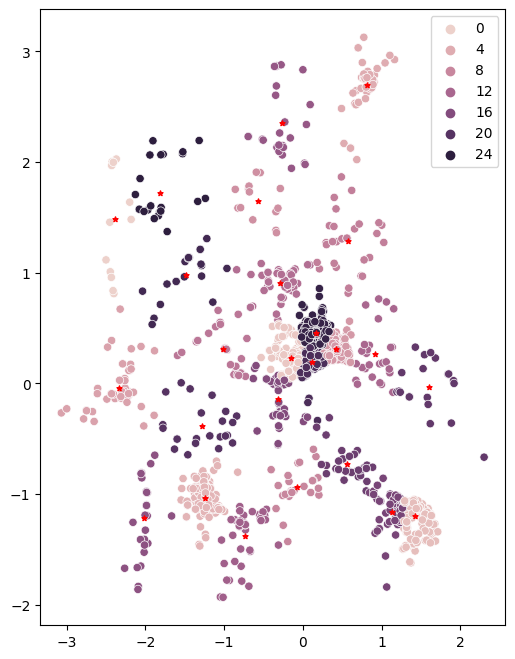

In [86]:
plt.figure(figsize = (6,8))
cluster = sns.scatterplot(data = X_scaled, x = X_scaled[:,1] , y = X_scaled[:,0], hue = cluster_labels)
#plt.scatter(x_scaled[:,0], x_scaled[:,1] , c= 'red', hue = cluster_labels) 
plt.scatter(cluster_centers[:,1], cluster_centers[:,0] , c= 'red', marker = '*', s= 14) 

In [87]:
features2 = ['speed_limit','weather_conditions']
X2 = humberside_acc[features2]

In [88]:
kmeans2 = KMeans(n_clusters=6, random_state=0, n_init='auto').fit(X2)

In [89]:
cluster_labels2 = kmeans2.predict(X2)
cluster_centers2 = kmeans2.cluster_centers_

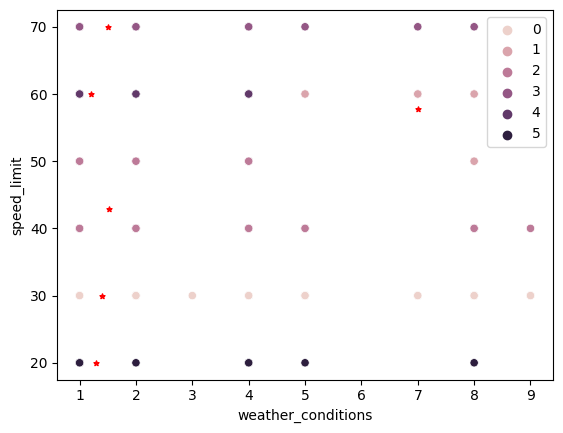

In [90]:
cluster = sns.scatterplot(data = X2, x = 'weather_conditions' , y = 'speed_limit', hue = cluster_labels2)
plt.scatter(cluster_centers2[:,1], cluster_centers2[:,0] , c= 'red', marker = '*', s= 14) 

### Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

In [91]:
vehicle_df['age_of_driver'] = vehicle_df['age_of_driver'].astype('int64')

array([[<Axes: title={'center': 'age_of_driver'}>]], dtype=object)

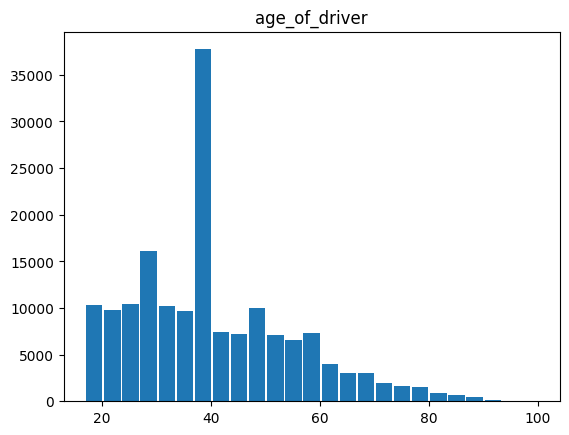

In [92]:
vehicle_df.hist(column = 'age_of_driver', bins=25, rwidth=0.9, grid=False)

array([[<Axes: title={'center': 'age_of_vehicle'}>]], dtype=object)

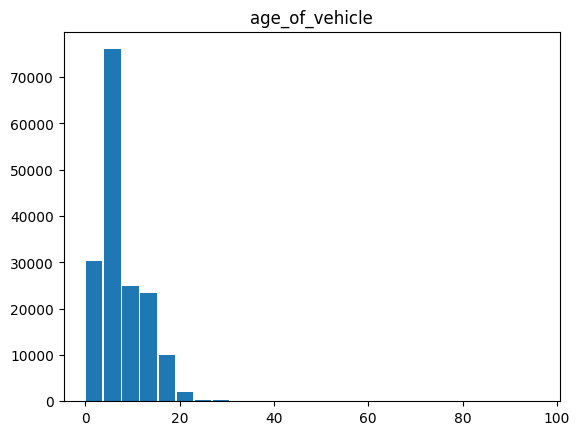

In [93]:
vehicle_df.hist(column = 'age_of_vehicle', bins=25, rwidth=0.9, grid=False)

In [129]:
Q1 = vehicle_df['age_of_driver'].quantile(0.25)
Q3 = vehicle_df['age_of_driver'].quantile(0.75)

In [130]:
IQR = Q3 - Q1
IQR

19.0

In [131]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [132]:
outliers = vehicle_df[(vehicle_df['age_of_driver'] < lower_bound) | (vehicle_df['age_of_driver'] > upper_bound)]


In [133]:
vehicle_df['is_outlier'] = vehicle_df['age_of_driver'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


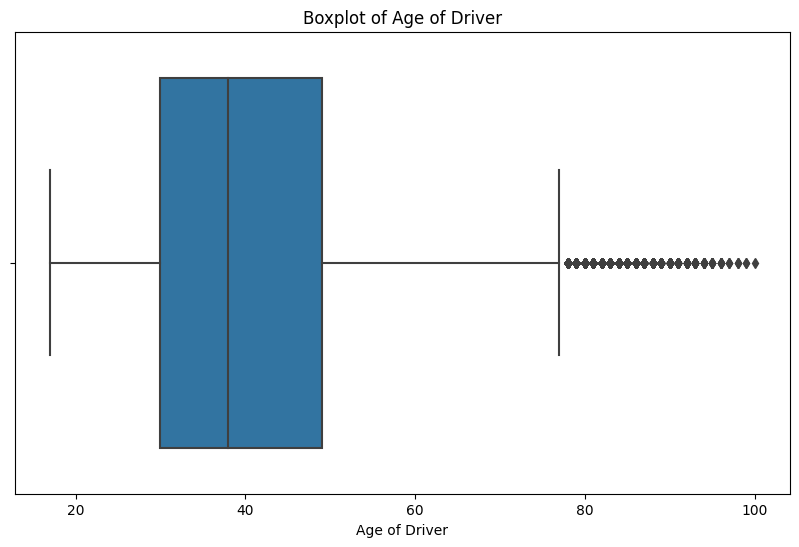

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=vehicle_df['age_of_driver'])
plt.title('Boxplot of Age of Driver')
plt.xlabel('Age of Driver')
plt.show()

### Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [94]:
casualty_df['casualty_severity'].unique()

array([3, 2, 1], dtype=int64)

In [95]:
casualty_df['casualty_severity'] = casualty_df['casualty_severity'].replace({3: 2})


In [96]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [121]:
X_p = casualty_df[['sex_of_casualty', 'age_of_casualty', 'casualty_class']]
y_p = casualty_df['casualty_severity'] == 1

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

In [123]:
# Train the model
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
# Make predictions
y_pred = dtree.predict(X_test)

In [125]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     22801
        True       0.00      0.00      0.00       316

    accuracy                           0.99     23117
   macro avg       0.49      0.50      0.50     23117
weighted avg       0.97      0.99      0.98     23117



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

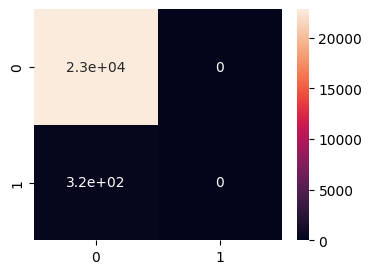

In [127]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)